In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot:xlabel='x', ylabel='y'>

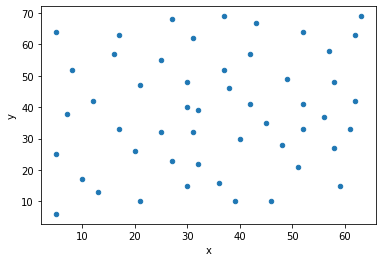

In [48]:
data = pd.read_csv('eil51.tsp.txt', sep=" ", header=None, skiprows = 6)
data.rename(columns = {0:'Node', 1:'x', 2:'y'}, inplace=True)
data.drop(data.tail(1).index,inplace=True)
data.plot.scatter('x', 'y')

In [49]:
optimal = pd.read_csv('eil51.opt.tour.txt', sep=" ", header=None, skiprows = 5)
optimal.drop(optimal.tail(1).index,inplace=True)
optimal_path = optimal[0].to_numpy()
optimal_path = list(map(int, optimal_path))
optimal_path = np.array(optimal_path)
optimal_path = optimal_path -1
optimal_path = optimal_path[:-1]

[ 1 22  8 26 31 28  3 36 35 20  2 29 21 16 50 34 30  9 49 10 39 33 45 15
 44 42 40 19 41 13 25 14 24 43  7 23 48  6 27 51 46 12 47 18  4 17 37  5
 38 11 32 -1]
[ 0 21  7 25 30 27  2 35 34 19  1 28 20 15 49 33 29  8 48  9 38 32 44 14
 43 41 39 18 40 12 24 13 23 42  6 22 47  5 26 50 45 11 46 17  3 16 36  4
 37 10 31]


In [50]:
x_coordinats = data['x'].to_numpy()
y_coordinats = data['y'].to_numpy()
coordinates = np.array([x_coordinats, y_coordinats])

def get_distance(a, b, coordinates):
    return np.sqrt(np.abs(coordinates[0, a] - coordinates[0, b])**2 + np.abs(coordinates[1, a] - coordinates[1, b])**2)

def get_total_distance(coordinates):
    distance = 0
    for i in range(len(coordinates[0])-1):
        distance += get_distance(i, i+1, coordinates)
    distance+= get_distance(0, len(coordinates[0])-1, coordinates)
    return distance

[[37. 49. 52. 20. 40. 21. 17. 31. 52. 51. 42. 31.  5. 12. 36. 52. 27. 17.
  13. 57. 62. 42. 16.  8.  7. 27. 30. 43. 58. 58. 37. 38. 46. 61. 62. 63.
  32. 45. 59.  5. 10. 21.  5. 30. 39. 32. 25. 25. 48. 56. 30.]
 [52. 49. 64. 26. 30. 47. 63. 62. 33. 21. 41. 32. 25. 42. 16. 41. 23. 33.
  13. 58. 42. 57. 57. 52. 38. 68. 48. 67. 48. 27. 69. 46. 10. 33. 63. 69.
  22. 35. 15.  6. 17. 10. 64. 15. 10. 39. 32. 55. 28. 37. 40.]]
1313.4683444443458


In [58]:
coordinates[0] = coordinates[0][optimal_path]
coordinates[1] = coordinates[1][optimal_path]
print('Cost of the optimal path to all 51 cities: ', get_total_distance(coordinates))

Cost of the optimal path to all 51 cities:  1667.331093945844


In [52]:
# Initialize the model parameters
# Make sure results are saved in lists to enable plotting
RUNS = 1000
T = 50
FACTOR = 0.99
x_coordinats = data['x'].to_numpy()
y_coordinats = data['y'].to_numpy()
coordinates = np.array([x_coordinats, y_coordinats])

initial_T = T
T_list = [T]

initial_cost = get_total_distance(coordinates)
cost_list = [initial_cost]
current_cost = initial_cost

# The number of iterations is twice the length of the markov chain
for i in range(RUNS):
    print(i, 'cost = ', current_cost)
    T = T*FACTOR
    T_list.append(T)
    
    for j in range(500):
        coord1, coord2 = np.random.randint(0, len(coordinates[0]), size=2)
        temp = [coordinates[0, coord1], coordinates[1, coord1]]
        coordinates[0, coord1] = coordinates[0, coord2]
        coordinates[1, coord1] = coordinates[1, coord2]
        coordinates[0, coord2] = temp[0]
        coordinates[1, coord2] = temp[1]
        new_cost = get_total_distance(coordinates)
        
        # accept the new route if its faster than the current fastest route
        if new_cost < current_cost:
            current_cost = new_cost
            
        # if not faster, uniformly pick a random variable and if this is lower than 
        # the markovian acceptance probability, accept the new route
        else:
            x = np.random.uniform()
            if x < np.exp((current_cost - new_cost)/T):
                current_cost = new_cost
            else:
                temp = [coordinates[0, coord1], coordinates[1, coord1]]
                coordinates[0, coord1] = coordinates[0, coord2]
                coordinates[1, coord1] = coordinates[1, coord2]
                coordinates[0, coord2] = temp[0]
                coordinates[1, coord2] = temp[1]
                
    cost_list.append(current_cost)


0 cost =  1313.4683444443458
1 cost =  1411.26832622896
2 cost =  1391.2666384812019
3 cost =  1630.1904771511954
4 cost =  1707.5615128724098
5 cost =  1348.673850290944
6 cost =  1528.9018214715884
7 cost =  1433.7448210146847
8 cost =  1554.5371889634694
9 cost =  1500.1257294478442
10 cost =  1496.7579445920226
11 cost =  1448.5027241369548
12 cost =  1481.6460641576864
13 cost =  1238.9754353979001
14 cost =  1549.5399282169187
15 cost =  1422.2401871175882
16 cost =  1529.751494809337
17 cost =  1354.522895165188
18 cost =  1475.405293187121
19 cost =  1407.698854058628
20 cost =  1567.6075734999831
21 cost =  1611.3836919656642
22 cost =  1338.362801740151
23 cost =  1422.8802002505588
24 cost =  1199.2586640002062
25 cost =  1414.6642811923052
26 cost =  1342.3111145919183
27 cost =  1456.0830120413634
28 cost =  1548.8319785599695
29 cost =  1472.3157525817883
30 cost =  1456.2710735978899
31 cost =  1455.2438069920422
32 cost =  1395.0366187981351
33 cost =  1421.397953601200

279 cost =  529.1973467494781
280 cost =  503.7496991114103
281 cost =  515.3170371647825
282 cost =  528.6526184751413
283 cost =  509.27957363141127
284 cost =  505.4623229777188
285 cost =  494.1839490642298
286 cost =  484.70132402934263
287 cost =  479.4685604259007
288 cost =  481.3687396917269
289 cost =  480.8297894263059
290 cost =  481.90979714626735
291 cost =  469.7061265378261
292 cost =  462.09407815974504
293 cost =  472.2385655118235
294 cost =  472.73704701881553
295 cost =  483.0449732263067
296 cost =  483.27740286330976
297 cost =  492.6790057592852
298 cost =  478.65125068536156
299 cost =  481.12814676042535
300 cost =  483.3846706704511
301 cost =  479.86767649811065
302 cost =  471.3786083409857
303 cost =  465.33431631430545
304 cost =  465.33431631430545
305 cost =  465.7869638218099
306 cost =  470.03610760858294
307 cost =  472.49986124247687
308 cost =  466.6628395205027
309 cost =  462.9747347025857
310 cost =  459.5741305267148
311 cost =  473.10169362682

547 cost =  455.28303182135375
548 cost =  455.28303182135375
549 cost =  455.28303182135375
550 cost =  455.28303182135375
551 cost =  455.28303182135375
552 cost =  455.28303182135375
553 cost =  455.28303182135375
554 cost =  455.28303182135375
555 cost =  455.28303182135375
556 cost =  455.28303182135375
557 cost =  455.28303182135375
558 cost =  455.28303182135375
559 cost =  455.28303182135375
560 cost =  455.28303182135375
561 cost =  455.28303182135375
562 cost =  455.28303182135375
563 cost =  455.28303182135375
564 cost =  455.28303182135375
565 cost =  455.28303182135375
566 cost =  455.28303182135375
567 cost =  455.28303182135375
568 cost =  455.28303182135375
569 cost =  455.28303182135375
570 cost =  455.28303182135375
571 cost =  455.28303182135375
572 cost =  455.28303182135375
573 cost =  455.28303182135375
574 cost =  455.28303182135375
575 cost =  455.28303182135375
576 cost =  455.28303182135375
577 cost =  455.28303182135375
578 cost =  455.28303182135375
579 cost

819 cost =  455.28303182135375
820 cost =  455.28303182135375
821 cost =  455.28303182135375
822 cost =  455.28303182135375
823 cost =  455.28303182135375
824 cost =  455.28303182135375
825 cost =  455.28303182135375
826 cost =  455.28303182135375
827 cost =  455.28303182135375
828 cost =  455.28303182135375
829 cost =  455.28303182135375
830 cost =  455.28303182135375
831 cost =  455.28303182135375
832 cost =  455.28303182135375
833 cost =  455.28303182135375
834 cost =  455.28303182135375
835 cost =  455.28303182135375
836 cost =  455.28303182135375
837 cost =  455.28303182135375
838 cost =  455.28303182135375
839 cost =  455.28303182135375
840 cost =  455.28303182135375
841 cost =  455.28303182135375
842 cost =  455.28303182135375
843 cost =  455.28303182135375
844 cost =  455.28303182135375
845 cost =  455.28303182135375
846 cost =  455.28303182135375
847 cost =  455.28303182135375
848 cost =  455.28303182135375
849 cost =  455.28303182135375
850 cost =  455.28303182135375
851 cost

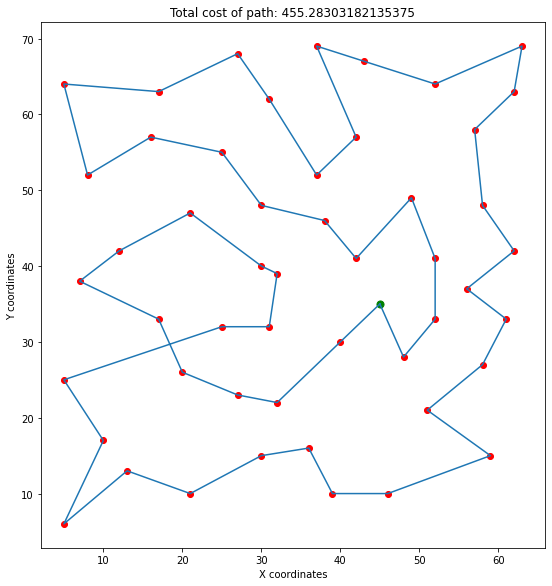

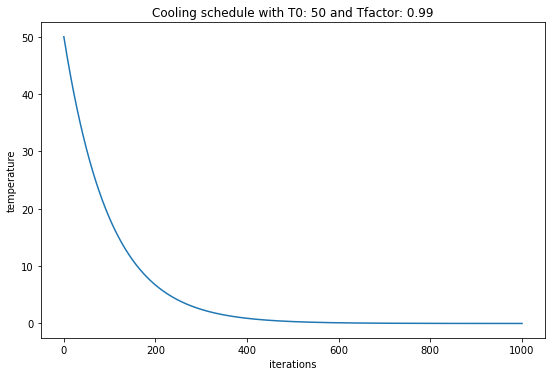

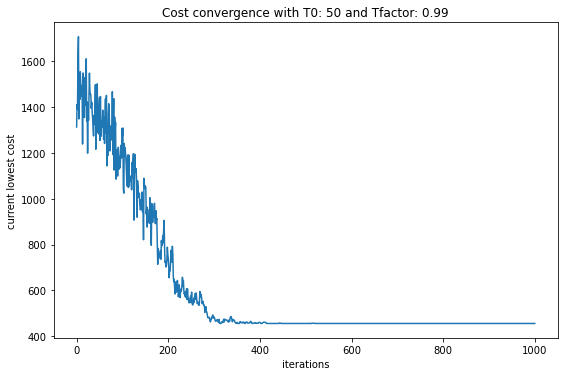

In [53]:
# DON'T FORGET TO DELETE SAVEFIG LINES BEFORE HANDING IN

# Plot optimal path
total_cost = get_total_distance(coordinates)                             
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Total cost of path: {}".format(total_cost))
x = np.array(np.append(coordinates[0], coordinates[0][0])) # make sure that path is round
y = np.array(np.append(coordinates[1], coordinates[1][0])) # make sure that path is round
plt.plot(x, y) # plot path
plt.scatter(coordinates[0][1:], coordinates[1][1:], c="red") # plot cities
plt.scatter(coordinates[0][0], coordinates[1][0], s=50, c="green") # starting city
plt.savefig("figs/path51_result_runs{1}_Tstart{2}_factor{3}.png".format(i, RUNS, initial_T, FACTOR), dpi=300)
ax.set_xlabel("X coordinates")
ax.set_ylabel("Y coordinates")
plt.show()

# Plot cooling schedule
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cooling schedule with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(T_list)
plt.savefig("figs/temperature51_result_runs{1}_Tstart{2}_factor{3}.png".format(i, RUNS, initial_T, FACTOR), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("temperature")
plt.show()

# Plot cost convergence
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cost convergence with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(cost_list)
plt.savefig("figs/temperature51_result_runs{1}_Tstart{2}_factor{3}.png".format(i, RUNS, initial_T, FACTOR), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("current lowest cost")
plt.show()


In [54]:
# Initialize the model parameters
# Make sure results are saved in lists to enable plotting
RUNS = 1000
T = 50
FACTOR = 0.99
x_coordinats = data['x'].to_numpy()
y_coordinats = data['y'].to_numpy()
coordinates = np.array([x_coordinats, y_coordinats])

initial_T = T
T_list = [T]

initial_cost = get_total_distance(coordinates)
cost_list = [initial_cost]
current_cost = initial_cost

# The number of iterations is twice the length of the markov chain
for i in range(RUNS):
    print(i, 'cost = ', current_cost)
    T = initial_T/(1+np.log(1+i))
    T_list.append(T)
    
    for j in range(500):
        coord1, coord2 = np.random.randint(0, len(coordinates[0]), size=2)
        temp = [coordinates[0, coord1], coordinates[1, coord1]]
        coordinates[0, coord1] = coordinates[0, coord2]
        coordinates[1, coord1] = coordinates[1, coord2]
        coordinates[0, coord2] = temp[0]
        coordinates[1, coord2] = temp[1]
        new_cost = get_total_distance(coordinates)
        
        # accept the new route if its faster than the current fastest route
        if new_cost < current_cost:
            current_cost = new_cost
            
        # if not faster, uniformly pick a random variable and if this is lower than 
        # the markovian acceptance probability, accept the new route
        else:
            x = np.random.uniform()
            if x < np.exp((current_cost - new_cost)/T):
                current_cost = new_cost
            else:
                temp = [coordinates[0, coord1], coordinates[1, coord1]]
                coordinates[0, coord1] = coordinates[0, coord2]
                coordinates[1, coord1] = coordinates[1, coord2]
                coordinates[0, coord2] = temp[0]
                coordinates[1, coord2] = temp[1]
                
    cost_list.append(current_cost)


0 cost =  1313.4683444443458
1 cost =  1543.6942893997143
2 cost =  1242.279835081993
3 cost =  1230.1401417823472
4 cost =  1131.6032319317978
5 cost =  1160.3748812434246
6 cost =  1175.450465873106
7 cost =  1207.8378991410266
8 cost =  1171.7285622396926
9 cost =  1047.048252804596
10 cost =  961.8754754662389
11 cost =  1306.6573625552207
12 cost =  1175.2632257806974
13 cost =  1144.3425792586502
14 cost =  1062.1850524970348
15 cost =  955.9226455471721
16 cost =  975.525534306026
17 cost =  982.0863655867873
18 cost =  922.5344908273721
19 cost =  1112.438948435622
20 cost =  1070.229218578118
21 cost =  1016.8473298790998
22 cost =  1076.5268737509464
23 cost =  1039.7701038258274
24 cost =  992.64916401915
25 cost =  1000.9514797202562
26 cost =  1043.264192408383
27 cost =  1067.9390590583812
28 cost =  998.4947467607219
29 cost =  927.9914799416929
30 cost =  915.3154073395546
31 cost =  987.9285848389912
32 cost =  840.6169264604245
33 cost =  856.6071117098343
34 cost =  

285 cost =  817.7589891883518
286 cost =  730.2229748888859
287 cost =  731.5775227566414
288 cost =  797.984950408774
289 cost =  815.9026145651333
290 cost =  825.2491946078837
291 cost =  834.0378255973517
292 cost =  824.5828679322989
293 cost =  828.6372099352693
294 cost =  824.5749101400116
295 cost =  841.7646937380392
296 cost =  846.90643969754
297 cost =  922.3734944660205
298 cost =  815.9404413848839
299 cost =  734.6832054071026
300 cost =  734.6297780969106
301 cost =  686.0763195521541
302 cost =  753.9495439425423
303 cost =  689.4620269562834
304 cost =  747.3930855910382
305 cost =  710.128245983063
306 cost =  782.6884703843042
307 cost =  689.5070705408576
308 cost =  764.6702941304869
309 cost =  715.7901727514738
310 cost =  810.2840664930429
311 cost =  879.2576724085362
312 cost =  740.0183610624572
313 cost =  705.3414760990439
314 cost =  728.4635324559954
315 cost =  724.710672000999
316 cost =  763.3023643086628
317 cost =  747.8721908056717
318 cost =  800

570 cost =  769.7383278429381
571 cost =  726.8569100672273
572 cost =  763.8838718690363
573 cost =  753.8884109559451
574 cost =  795.1381221151864
575 cost =  849.2068210699695
576 cost =  791.0739318652813
577 cost =  809.96497302391
578 cost =  775.3360262805822
579 cost =  688.2272225930117
580 cost =  746.9629411189605
581 cost =  712.5306822296262
582 cost =  701.1182108796111
583 cost =  696.9445717725523
584 cost =  664.6894659617758
585 cost =  725.9582996423011
586 cost =  720.6352899584178
587 cost =  672.1164472559836
588 cost =  644.7527814843592
589 cost =  635.2103636375432
590 cost =  606.7647679700706
591 cost =  607.9705178039327
592 cost =  637.7886554321356
593 cost =  639.192688332972
594 cost =  587.3029351629489
595 cost =  722.0382486810854
596 cost =  719.1289453385257
597 cost =  797.8665523650044
598 cost =  723.0243635119512
599 cost =  728.4421509250687
600 cost =  735.2673655883464
601 cost =  682.1881000397216
602 cost =  726.1753853998835
603 cost =  7

850 cost =  718.1961490880249
851 cost =  761.4234173842196
852 cost =  821.6557999225015
853 cost =  790.3337518838782
854 cost =  796.1690410966419
855 cost =  831.7931047263496
856 cost =  839.0843963536765
857 cost =  826.4840524227455
858 cost =  799.3275150047647
859 cost =  752.0247319971438
860 cost =  771.5337586907515
861 cost =  752.9289085318178
862 cost =  796.0634419105735
863 cost =  726.5618000828337
864 cost =  718.56268763716
865 cost =  675.8510750487163
866 cost =  644.2671259829668
867 cost =  718.7248161405735
868 cost =  654.1524471805484
869 cost =  710.0658577995388
870 cost =  734.9662663515464
871 cost =  658.6362615437386
872 cost =  604.4914871079854
873 cost =  665.5679730537697
874 cost =  657.1083175335964
875 cost =  684.9276388242818
876 cost =  683.5208487594838
877 cost =  702.0447882509231
878 cost =  622.7418405671941
879 cost =  721.956951543405
880 cost =  700.3030351213548
881 cost =  697.8531008887428
882 cost =  701.2856444919405
883 cost =  7

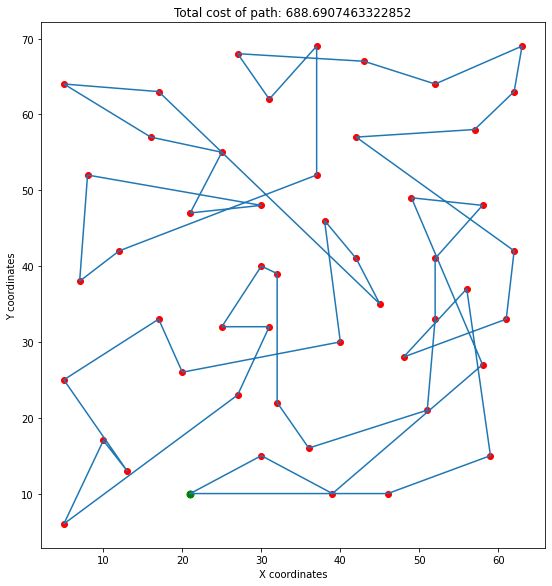

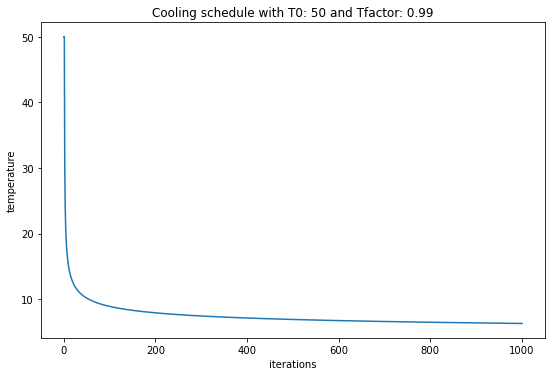

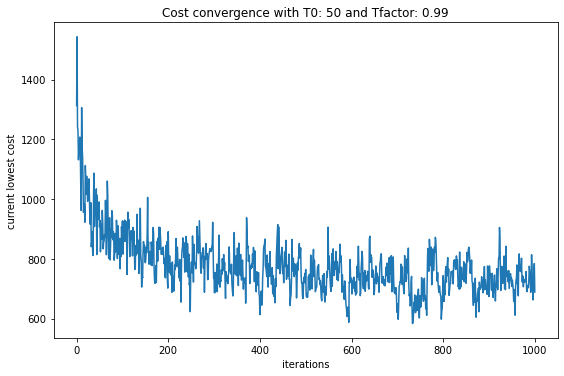

In [55]:
# DON'T FORGET TO DELETE SAVEFIG LINES BEFORE HANDING IN

# Plot optimal path
total_cost = get_total_distance(coordinates)                             
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Total cost of path: {}".format(total_cost))
x = np.array(np.append(coordinates[0], coordinates[0][0])) # make sure that path is round
y = np.array(np.append(coordinates[1], coordinates[1][0])) # make sure that path is round
plt.plot(x, y) # plot path
plt.scatter(coordinates[0][1:], coordinates[1][1:], c="red") # plot cities
plt.scatter(coordinates[0][0], coordinates[1][0], s=50, c="green") # starting city
plt.savefig("figs/path51_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("X coordinates")
ax.set_ylabel("Y coordinates")
plt.show()

# Plot cooling schedule
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cooling schedule with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(T_list)
plt.savefig("figs/temperature51_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("temperature")
plt.show()

# Plot cost convergence
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cost convergence with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(cost_list)
plt.savefig("figs/temperature51_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("current lowest cost")
plt.show()


In [56]:
# Initialize the model parameters
# Make sure results are saved in lists to enable plotting
RUNS = 2000
T = 50
FACTOR = 0.99
x_coordinats = data['x'].to_numpy()
y_coordinats = data['y'].to_numpy()
coordinates = np.array([x_coordinats, y_coordinats])

initial_T = T
T_list = [T]

initial_cost = get_total_distance(coordinates)
cost_list = [initial_cost]
current_cost = initial_cost

# The number of iterations is twice the length of the markov chain
for i in range(RUNS):
    print(i, 'cost = ', current_cost)
    T = initial_T/(1+np.log(1+i))
    T_list.append(T)
    
    for j in range(500):
        coord1, coord2 = np.random.randint(0, len(coordinates[0]), size=2)
        temp = [coordinates[0, coord1], coordinates[1, coord1]]
        coordinates[0, coord1] = coordinates[0, coord2]
        coordinates[1, coord1] = coordinates[1, coord2]
        coordinates[0, coord2] = temp[0]
        coordinates[1, coord2] = temp[1]
        new_cost = get_total_distance(coordinates)
        
        # accept the new route if its faster than the current fastest route
        if new_cost < current_cost:
            current_cost = new_cost
            
        # if not faster, uniformly pick a random variable and if this is lower than 
        # the markovian acceptance probability, accept the new route
        else:
            x = np.random.uniform()
            if x < np.exp((current_cost - new_cost)/T):
                current_cost = new_cost
            else:
                temp = [coordinates[0, coord1], coordinates[1, coord1]]
                coordinates[0, coord1] = coordinates[0, coord2]
                coordinates[1, coord1] = coordinates[1, coord2]
                coordinates[0, coord2] = temp[0]
                coordinates[1, coord2] = temp[1]
                
    cost_list.append(current_cost)


0 cost =  1313.4683444443458
1 cost =  1445.4924508989452
2 cost =  1241.8161726146068
3 cost =  1375.882230796494
4 cost =  1223.232608134215
5 cost =  1229.8467958967874
6 cost =  1246.2067651079954
7 cost =  1175.1060731844066
8 cost =  1202.0439132437984
9 cost =  1251.2508146543184
10 cost =  1110.8291841350692
11 cost =  1185.3388151306854
12 cost =  1267.8854981753175
13 cost =  1279.7589668375947
14 cost =  1014.0246891094621
15 cost =  1006.7808376922608
16 cost =  1084.8197575807517
17 cost =  1133.2506876124162
18 cost =  1058.3420329750118
19 cost =  1035.3406567039356
20 cost =  1056.9908232171674
21 cost =  1059.3539186072742
22 cost =  1042.95015484147
23 cost =  1056.0913742396522
24 cost =  1076.7562583302195
25 cost =  964.5554007799936
26 cost =  1116.1196021160385
27 cost =  1158.607366777467
28 cost =  1027.2597772882364
29 cost =  907.3424775321159
30 cost =  877.4497097514463
31 cost =  1082.652667997414
32 cost =  976.5294163554082
33 cost =  978.6081288060585
3

284 cost =  762.0655458794126
285 cost =  763.8782365797844
286 cost =  783.2354697867922
287 cost =  787.6809709715701
288 cost =  838.2971443322655
289 cost =  785.8506705098545
290 cost =  792.2904665471525
291 cost =  869.1091120659349
292 cost =  842.3026136543143
293 cost =  934.9164229972296
294 cost =  911.7965264298916
295 cost =  824.0845226475124
296 cost =  763.9597137566793
297 cost =  820.5975923708328
298 cost =  802.9776031324014
299 cost =  848.8813935846866
300 cost =  852.1356857907189
301 cost =  819.895456734407
302 cost =  722.4246654613057
303 cost =  682.9550857481994
304 cost =  741.6077009940796
305 cost =  786.2108065398023
306 cost =  776.3207195222922
307 cost =  718.4598457641445
308 cost =  782.1235486212113
309 cost =  807.6306954037367
310 cost =  840.5694873683022
311 cost =  797.9682597237551
312 cost =  774.2388765565513
313 cost =  789.9858765790689
314 cost =  757.0052941425582
315 cost =  808.3438907543672
316 cost =  813.9917737856705
317 cost = 

561 cost =  698.7916862445054
562 cost =  770.5217185021729
563 cost =  773.753179549244
564 cost =  755.9863497202836
565 cost =  734.6711673609964
566 cost =  661.7866722116997
567 cost =  654.1376584242448
568 cost =  670.4947556935892
569 cost =  750.3754510388563
570 cost =  736.0601419084317
571 cost =  715.0132200672791
572 cost =  699.8635624508482
573 cost =  731.6309447646444
574 cost =  671.4106471594002
575 cost =  730.1211518816415
576 cost =  704.681439977883
577 cost =  742.153676035545
578 cost =  744.7545585489977
579 cost =  748.5852921540197
580 cost =  769.5818864648512
581 cost =  699.1818275836829
582 cost =  793.9035519677038
583 cost =  744.8848555817638
584 cost =  777.1247278756799
585 cost =  741.7605603696663
586 cost =  746.0549943728457
587 cost =  751.4089098084619
588 cost =  714.334979413765
589 cost =  647.6637552168038
590 cost =  769.5847516895623
591 cost =  791.6136852677523
592 cost =  734.7721826153793
593 cost =  699.3441869452686
594 cost =  68

842 cost =  749.4270530201183
843 cost =  779.6179094087
844 cost =  728.7078344494809
845 cost =  745.4497058213707
846 cost =  708.5557884571707
847 cost =  724.8931193593628
848 cost =  790.8172099707108
849 cost =  746.1707280189156
850 cost =  797.6195550243109
851 cost =  822.4905548119112
852 cost =  741.4802507833282
853 cost =  726.261776283855
854 cost =  662.6354973804532
855 cost =  667.2843877380901
856 cost =  793.7968217727379
857 cost =  665.9850157063019
858 cost =  674.2174820385528
859 cost =  681.9169820529656
860 cost =  683.3668439498207
861 cost =  715.4107892356456
862 cost =  758.7569274999589
863 cost =  771.880679189744
864 cost =  728.8608158322604
865 cost =  803.6336576386866
866 cost =  740.6017405332934
867 cost =  685.0104588012083
868 cost =  711.095311274752
869 cost =  762.5554214163059
870 cost =  746.5454790044561
871 cost =  676.3370349484185
872 cost =  723.5621197269018
873 cost =  763.0256079014121
874 cost =  762.1602023536796
875 cost =  741.

1114 cost =  733.130946673011
1115 cost =  720.1045717108555
1116 cost =  659.4265178820099
1117 cost =  683.593025587571
1118 cost =  705.2770553759458
1119 cost =  633.4816753125039
1120 cost =  667.3321870013727
1121 cost =  674.0942315955579
1122 cost =  733.6901497692052
1123 cost =  736.1648789758203
1124 cost =  723.998949539681
1125 cost =  713.1631330506937
1126 cost =  723.6082890542621
1127 cost =  755.201383119751
1128 cost =  700.9328654840554
1129 cost =  731.8544262018199
1130 cost =  712.3318169223421
1131 cost =  640.3758860271739
1132 cost =  643.7301017812803
1133 cost =  636.4981384423361
1134 cost =  623.2809013421656
1135 cost =  658.0209484283467
1136 cost =  623.7686831610649
1137 cost =  659.5190824604606
1138 cost =  647.9515619108831
1139 cost =  655.9764129651396
1140 cost =  649.386131189872
1141 cost =  717.9458548010762
1142 cost =  735.8422825602075
1143 cost =  694.1971858174778
1144 cost =  722.1390644000202
1145 cost =  724.2412018040403
1146 cost =  

1383 cost =  661.1585071913617
1384 cost =  647.8985041003347
1385 cost =  704.3599968198373
1386 cost =  653.188979491886
1387 cost =  672.7730959084544
1388 cost =  685.1975067085622
1389 cost =  712.2714161240914
1390 cost =  691.9994379644481
1391 cost =  669.677815263747
1392 cost =  651.1647447270691
1393 cost =  641.5748693692583
1394 cost =  591.9813433941981
1395 cost =  636.7905807099311
1396 cost =  622.8756886946335
1397 cost =  640.6354666370106
1398 cost =  593.4512722986378
1399 cost =  595.1115812467898
1400 cost =  628.5032700161476
1401 cost =  698.0276473150236
1402 cost =  723.2998050065008
1403 cost =  716.8831001343151
1404 cost =  656.3539098610565
1405 cost =  679.0421062584655
1406 cost =  674.3931390514406
1407 cost =  684.1231433270492
1408 cost =  669.2088035465828
1409 cost =  697.8387260670877
1410 cost =  709.3709252392333
1411 cost =  717.8879442556776
1412 cost =  741.7656908354812
1413 cost =  760.9594986036934
1414 cost =  712.2973236355191
1415 cost 

1652 cost =  641.865521707103
1653 cost =  698.1581458196437
1654 cost =  703.2900615775386
1655 cost =  698.6637732147459
1656 cost =  658.9778082299482
1657 cost =  705.8676361817605
1658 cost =  655.2705178679237
1659 cost =  651.3894899509594
1660 cost =  671.4700341800651
1661 cost =  689.2464521643597
1662 cost =  699.8591591512992
1663 cost =  655.6326529084356
1664 cost =  691.0666599396666
1665 cost =  667.9980153394321
1666 cost =  675.2846082301061
1667 cost =  736.0918678465878
1668 cost =  647.5598883541419
1669 cost =  613.6486247039329
1670 cost =  635.0918190299532
1671 cost =  652.4217019404794
1672 cost =  721.4061207072087
1673 cost =  596.0259856117173
1674 cost =  641.8964062387311
1675 cost =  681.2308191555079
1676 cost =  730.1305830036262
1677 cost =  702.708285788595
1678 cost =  676.7749839419034
1679 cost =  668.4108212811389
1680 cost =  666.9312294551344
1681 cost =  702.7276979346711
1682 cost =  664.6731102564421
1683 cost =  686.8785573845084
1684 cost 

1918 cost =  703.8906485680326
1919 cost =  763.8058001206539
1920 cost =  670.5585442579154
1921 cost =  640.3086252922305
1922 cost =  697.9003463571528
1923 cost =  632.1528289210306
1924 cost =  626.624996619087
1925 cost =  648.9969402516767
1926 cost =  690.6573214978728
1927 cost =  653.9622979872806
1928 cost =  659.0753157054837
1929 cost =  617.0538918002169
1930 cost =  637.0316837323563
1931 cost =  645.3570044161831
1932 cost =  626.6125435365391
1933 cost =  663.5468158082324
1934 cost =  679.419357358995
1935 cost =  669.7418043175664
1936 cost =  681.7537363235399
1937 cost =  708.4425783025587
1938 cost =  701.2921447002597
1939 cost =  730.604658992606
1940 cost =  748.5368873867684
1941 cost =  748.6090968842357
1942 cost =  696.8008035162628
1943 cost =  712.2521808735336
1944 cost =  696.6381898939887
1945 cost =  648.1329464259081
1946 cost =  718.700164793229
1947 cost =  668.6443442673442
1948 cost =  749.6558312777935
1949 cost =  793.20042498105
1950 cost =  7

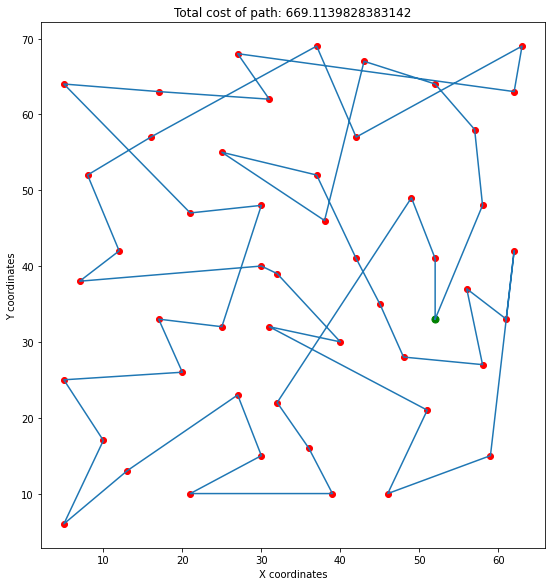

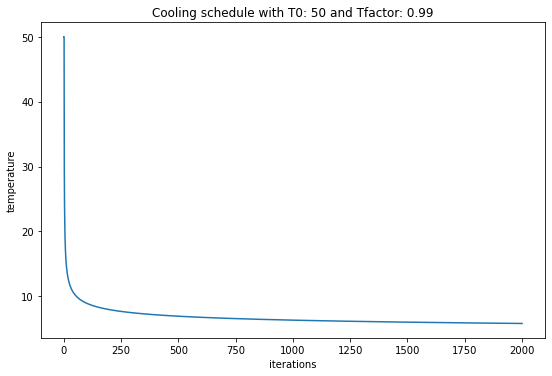

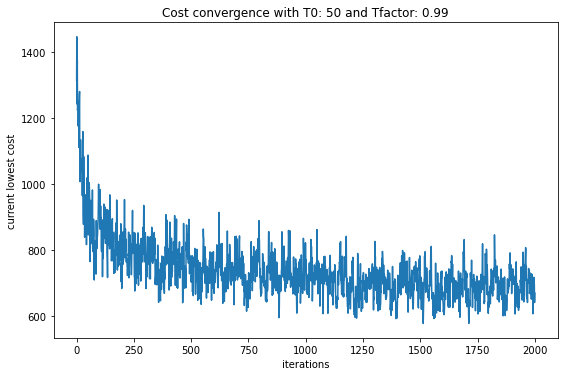

In [57]:
# DON'T FORGET TO DELETE SAVEFIG LINES BEFORE HANDING IN

# Plot optimal path
total_cost = get_total_distance(coordinates)                             
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Total cost of path: {}".format(total_cost))
x = np.array(np.append(coordinates[0], coordinates[0][0])) # make sure that path is round
y = np.array(np.append(coordinates[1], coordinates[1][0])) # make sure that path is round
plt.plot(x, y) # plot path
plt.scatter(coordinates[0][1:], coordinates[1][1:], c="red") # plot cities
plt.scatter(coordinates[0][0], coordinates[1][0], s=50, c="green") # starting city
plt.savefig("figs/path51_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("X coordinates")
ax.set_ylabel("Y coordinates")
plt.show()

# Plot cooling schedule
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cooling schedule with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(T_list)
plt.savefig("figs/temperature51_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("temperature")
plt.show()

# Plot cost convergence
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title("Cost convergence with T0: {0} and Tfactor: {1}".format(initial_T, FACTOR))
plt.plot(cost_list)
plt.savefig("figs/temperature51_result_runs{1}_Tstart{2}_log.png".format(i, RUNS, initial_T), dpi=300)
ax.set_xlabel("iterations")
ax.set_ylabel("current lowest cost")
plt.show()
